In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('real_estate_texas_500_2024.csv')

print(df.head())

                                                 url    status          id  \
0  https://www.realtor.com/realestateandhomes-det...  for_sale  9773941616   
1  https://www.realtor.com/realestateandhomes-det...  for_sale  9224923922   
2  https://www.realtor.com/realestateandhomes-det...  for_sale  9840661824   
3  https://www.realtor.com/realestateandhomes-det...  for_sale  7338317229   
4  https://www.realtor.com/realestateandhomes-det...  for_sale  7285845528   

   listPrice  baths  baths_full  baths_full_calc  beds    sqft  stories  \
0   240000.0      2         2.0              2.0   3.0  1190.0      1.0   
1   379900.0      4         3.0              3.0   4.0  2033.0      1.0   
2   370000.0      2         2.0              2.0   4.0  2062.0      1.0   
3   444000.0      4         3.0              3.0   5.0  3705.0      2.0   
4   569000.0      2         2.0              2.0   3.0  3282.0      2.0   

  sub_type                                               text           type  \


In [7]:
df.shape

(501, 14)

In [8]:
df.columns

Index(['url', 'status', 'id', 'listPrice', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'sqft', 'stories', 'sub_type', 'text',
       'type', 'year_built'],
      dtype='object')

In [9]:
df.describe()

,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,year_built
count,5.010000e+02,4.990000e+02,501.000000,436.000000,436.000000,440.000000,438.000000,391.000000,289.000000
mean,9.193045e+09,5.106686e+05,2.323353,2.332569,2.332569,3.454545,2334.568493,1.375959,1999.536332
std,7.789197e+08,1.321054e+06,1.286559,0.759276,0.759276,0.914439,3220.244985,0.525586,25.400942
min,7.021680e+09,1.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,8.995365e+09,2.647450e+05,2.000000,2.000000,2.000000,3.000000,1604.250000,1.000000,1981.000000
50%,9.419976e+09,3.749000e+05,2.000000,2.000000,2.000000,3.000000,2034.500000,1.000000,2006.000000
75%,9.798074e+09,5.390000e+05,3.000000,3.000000,3.000000,4.000000,2636.500000,2.000000,2022.000000
max,9.992374e+09,2.895000e+07,8.000000,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


In [10]:
df.drop(['url','text','sub_type','id'], inplace = True, axis=1)

In [11]:
missing_values_count=df.isnull().sum()
print(missing_values_count)

status               0
listPrice            2
baths                0
baths_full          65
baths_full_calc     65
beds                61
sqft                63
stories            110
type                 0
year_built         212
dtype: int64


In [12]:
df['listPrice'] = df['listPrice'].fillna(df['listPrice'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           501 non-null    object 
 1   listPrice        501 non-null    float64
 2   baths            501 non-null    int64  
 3   baths_full       436 non-null    float64
 4   baths_full_calc  436 non-null    float64
 5   beds             440 non-null    float64
 6   sqft             438 non-null    float64
 7   stories          391 non-null    float64
 8   type             501 non-null    object 
 9   year_built       289 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 39.3+ KB


In [13]:
grouped = df.groupby ('type')

df.head()

,status,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,type,year_built
0,for_sale,240000.0,2,2.0,2.0,3.0,1190.0,1.0,single_family,2018.0
1,for_sale,379900.0,4,3.0,3.0,4.0,2033.0,1.0,single_family,2002.0
2,for_sale,370000.0,2,2.0,2.0,4.0,2062.0,1.0,single_family,2012.0
3,for_sale,444000.0,4,3.0,3.0,5.0,3705.0,2.0,single_family,1985.0
4,for_sale,569000.0,2,2.0,2.0,3.0,3282.0,2.0,single_family,1981.0


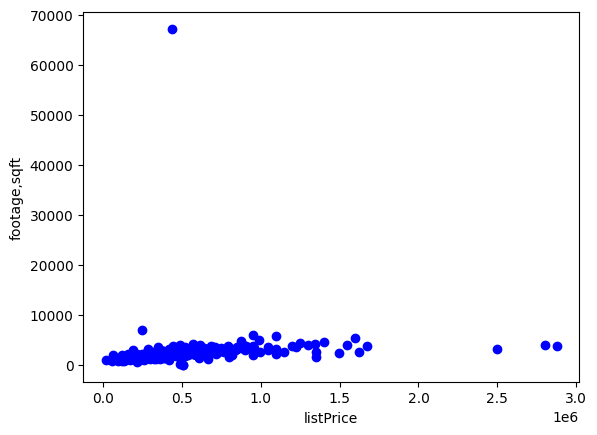

In [14]:
x = df.iloc[:,1:2].values
y = df.iloc[:,-4:-3].values
plt.xlabel('listPrice')
plt.ylabel('footage,sqft')

plt.scatter(x,y,color='b')

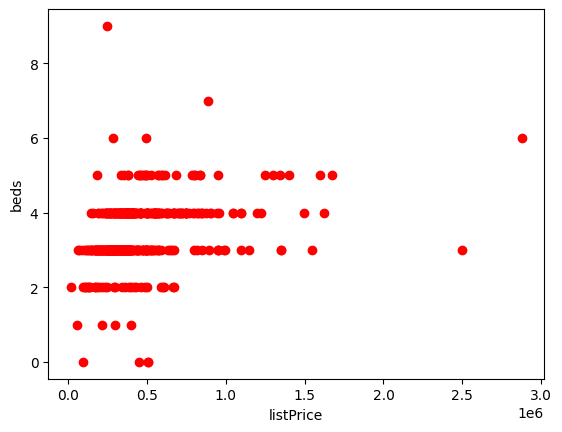

In [15]:
x = df.iloc[:,1:2].values
y = df.iloc[:,-5:-4].values
plt.xlabel('listPrice')
plt.ylabel('beds')

plt.scatter(x,y,color='r')

<function matplotlib.pyplot.show(close=None, block=None)>

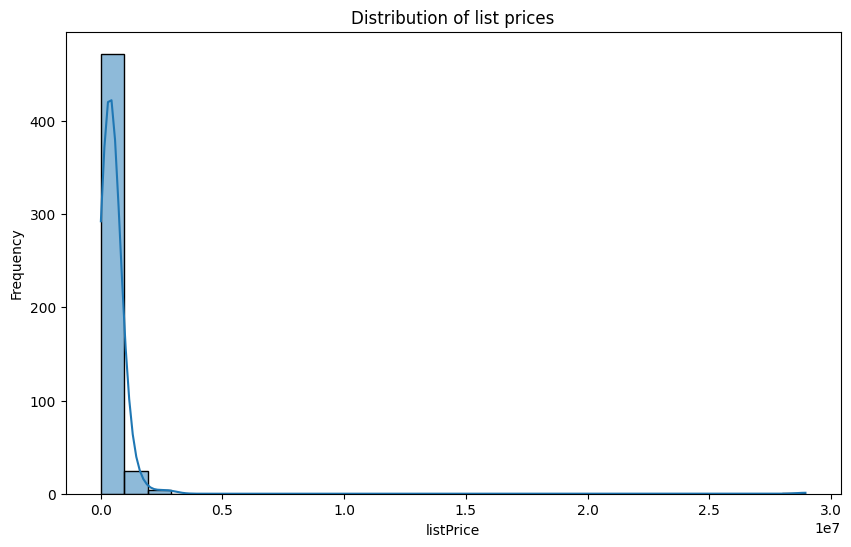

In [16]:
plt.figure(figsize = (10,6))
sns.histplot(df['listPrice'], bins=30,kde=True)
plt.title("Distribution of list prices")
plt.xlabel('listPrice')
plt.ylabel("Frequency")
plt.show

In [17]:
df['listPrice'].describe()

count    5.010000e+02
mean     5.106686e+05
std      1.318409e+06
min      1.000000e+04
25%      2.650000e+05
50%      3.749900e+05
75%      5.390000e+05
max      2.895000e+07
Name: listPrice, dtype: float64

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y='type', data=df, palette='Set1')
plt.title('Property types')
plt.xlabel('count')
plt.ylabel('type')
plt.show

In [19]:
type_property= df['type'].value_counts().reset_index()
type_property.columns=['type', 'count']
type_property

,type,count
0,single_family,402
1,land,49
2,farm,26
3,mobile,12
4,townhomes,6
5,condos,5
6,multi_family,1


In [20]:
# Property by construction year

year_group = df.groupby('year_built').agg(average_listprice = ('listPrice','mean'),average_footage=('sqft','mean')).reset_index()

year_group = year_group.sort_values(by='year_built')
year_group

,year_built,average_listprice,average_footage
0,1891.0,8.000000e+05,1634.000000
1,1895.0,4.998000e+05,1752.000000
2,1930.0,2.800000e+05,2448.000000
3,1938.0,1.349000e+06,2590.000000
4,1939.0,5.199000e+05,3493.000000
...,...,...,...
72,2020.0,6.392654e+05,2598.923077
73,2021.0,5.250641e+05,2558.785714
74,2022.0,6.034206e+05,2389.562500
75,2023.0,5.084275e+05,2039.538462


In [21]:
df['sqft'].fillna(0,inplace=True)


In [22]:
from sklearn.linear_model import LinearRegression

x=df.iloc[:,1:2].values
y=df.iloc[:,-4:-3].values
print(x)
print(y)

re_model=LinearRegression()

re_model.fit(x,y)

[[2.40000000e+05]
 [3.79900000e+05]
 [3.70000000e+05]
 [4.44000000e+05]
 [5.69000000e+05]
 [8.75000000e+05]
 [2.14500000e+05]
 [1.84900000e+05]
 [3.74900000e+05]
 [1.99900000e+05]
 [2.07000000e+05]
 [4.98000000e+05]
 [2.09900000e+05]
 [2.87500000e+05]
 [1.89900000e+05]
 [1.50000000e+05]
 [9.00000000e+04]
 [2.09000000e+05]
 [1.45000000e+05]
 [2.69950000e+05]
 [5.99000000e+05]
 [5.79000000e+05]
 [2.50000000e+05]
 [2.36500000e+05]
 [1.35000000e+05]
 [2.89500000e+07]
 [6.75000000e+05]
 [2.80000000e+05]
 [6.35000000e+05]
 [7.12500000e+05]
 [3.95000000e+05]
 [2.40000000e+05]
 [5.19900000e+05]
 [5.75000000e+05]
 [9.50000000e+04]
 [5.30000000e+05]
 [2.29900000e+05]
 [1.15000000e+05]
 [4.25000000e+05]
 [1.90000000e+04]
 [5.75000000e+05]
 [1.69900000e+05]
 [4.98000000e+05]
 [3.40000000e+05]
 [2.79900000e+05]
 [6.69000000e+05]
 [2.99900000e+05]
 [3.00000000e+05]
 [2.59900000e+05]
 [5.39000000e+05]
 [5.19900000e+05]
 [6.00000000e+04]
 [6.10000000e+05]
 [1.79500000e+05]
 [1.54900000e+05]
 [2.699000

LinearRegression()

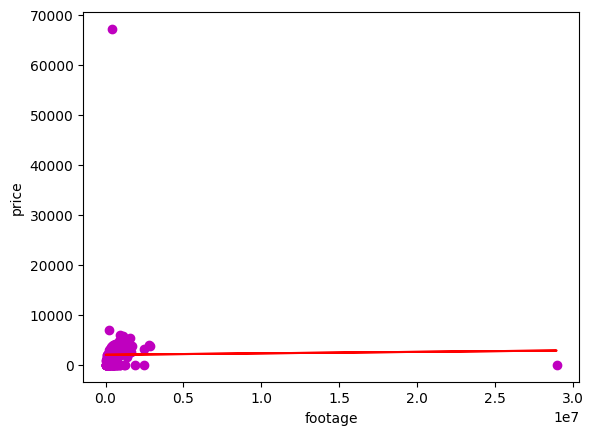

In [23]:
y_pred=re_model.predict(x)

plt.scatter(x,y,color='m')
plt.plot(x,y_pred, color='r')

plt.ylabel('price')
plt.xlabel('footage')
plt.show()

In [26]:
df['sqft'].fillna(0,inplace=True)
df['beds'].fillna(0,inplace=True)
X=df[['sqft','beds']]
y=df['listPrice']

re_regr = LinearRegression()
re_regr.fit(X,y)

LinearRegression()

In [ ]:
predicted_price_mult = re_regr.predict([[1500.0,3.0]])
print((predicted_price_mult))